# Titanic Project

In this project, I will be looking at a partial list of names taken from the Titanic manifest. I am going to see if I can find correlations between sex, age, ticket price, and class; and survivorship on the Titanic. I will also look to find any other interesting relationships and conclusions that can be drawn from this information.

***

In [77]:
import unicodecsv
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

titanic_df = pd.read_csv('titanic_data.csv')

In [78]:
titanic_df.describe()

# Looking at an overveiw of the data, we can see that all of the data is there, excepot for age (177 missing) and  
# cabin. This is troublesome. We probably don't want to delete these entries missing age data because we would lose 
# a large portion of our overall data. We can look at how age affected survival by itself, but it would be 
# difficult to mix this with othre variables. The most useful information to be gathered from this chart is 
# the mean survival rate and mean class. Information on fare price will be very useful later.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
# -- 177 missing age entries and 687 missing cabin entries.
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
# In the case that we would want to look at data that does not include the passengers with missing
# age data, I have created the list 'new_list'. This will probably be unnecessary because pandas
# already deal with missing data well.

new_list = []
for each_name in titanic_data:
    if each_name['Age'] == '':
        None
    else:
        new_list.append(each_name)
len (new_list)   

new_df = pd.DataFrame.from_dict(new_list)   



new_df.groupby(['Pclass']).size()


Pclass
1    186
2    173
3    355
dtype: int64

I will first investigate the effect that sex, by itself, had on survival rate.

In [80]:
total_passengers = 891

male_list = titanic_df[(titanic_df.Sex == 'male')]
print ("Total number of males =", len(male_list))

female_list = titanic_df[(titanic_df.Sex == 'female')]
print ("Total number of females =", len(female_list))

print ("Percentage of male passengers =", len(male_list)/total_passengers)
print ("Percentage of female passengers =", len(female_list)/total_passengers)

Total number of males = 577
Total number of females = 314
Percentage of male passengers = 0.6475869809203143
Percentage of female passengers = 0.35241301907968575


In [81]:
titanic_df['Survived'].mean()

#As a reminder, we can see that about 38% of people survived.

0.3838383838383838

In [82]:
# Here we have the number of passengers and number of survivors of each sex, and their respective survival rates.

mf = titanic_df.groupby('Sex')['Survived'].agg([len, np.sum, np.mean])
mf.rename(columns = {'len':'# of Passengers', 'sum':'# of Survivors', 'mean':'Survival Rate'})

,# of Passengers,# of Survivors,Survival Rate
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


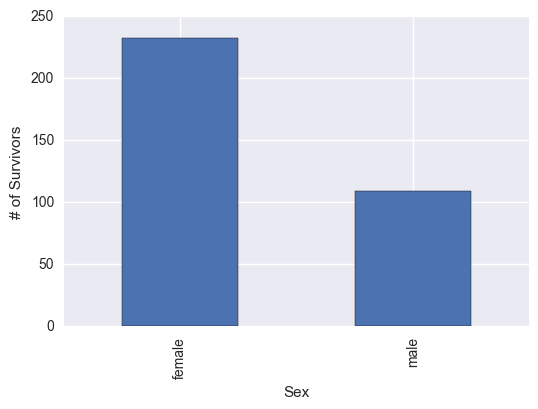

In [106]:
#Chart of total count of female vs male survivors.

t = titanic_df
t = t[t.Survived == 1]
t = t.groupby(['Sex']).size().plot(kind = 'bar')
t.set(ylabel = '# of Survivors')
t

By looking at the mean in the 'survived' column in the table above, we can see that 38.4% of people survived the Titanic disaster. This equates to a total of about 342 people, which matches the calculations above. Males made up a majority of the passengers (577), but only 109 survived, giving a male survival rate of 18.9%. Women had 233 surviving out of the original 314, giving a survival rate of 74.2%. This is useful information by itself, but we should be careful to draw conclusions before further inspection. We also should assume that class was an important factor contributing to survivorship. But first, let's see what we can learn by analyzing ticket price:

In [84]:
# We can see above that the mean fare was about $32.It might be interesting to see if the amount a passenger paid
# had an efffect on his/her chances of survival. Let's measure one standard deviation($50) above the average.

fare = titanic_df[(titanic_df.Fare > 82)]
print ("Number of people who paid more than $82 =", len(fare))

Number of people who paid more than $82 = 73


In [85]:
fare_survived = titanic_df[(titanic_df.Fare > 82) & (titanic_df.Survived == 1)]
print("Number of people who paid more than $82 and survived =", len(fare_survived))

fare_pclass = titanic_df[(titanic_df.Fare > 82)& (titanic_df.Pclass == 1)]
print ("Number of people who paid more than $82 and were in 1st class =", len(fare_pclass))

Number of people who paid more than $82 and survived = 56
Number of people who paid more than $82 and were in 1st class = 73


Initially, it looks like people who had more expensive tickets did have a better chance of surviving. But we can see that 73/73 people who paid more than 82 dollars were in first class; ticket price and class are tightly correlated. About 77 percent of people who paid more than 82 dollars survived, and as you will see below, first class had a survival rate of 63 percent.

In [86]:
# That is interesting. But keep in mind that this distribution of prices is heavily skewed by a few very 
# expensive tickets; the median ticket price was about $14.50.
# What about the super high end -- say greater than $200?

expensive_fare = titanic_df[(titanic_df.Fare > 200)]
print ("Number of people who paid more than $200 =", len(expensive_fare))

expensive_fare_survived = titanic_df[(titanic_df.Fare > 200) & (titanic_df.Survived == 1)]
print("Number of people who paid more than $200 and survived =", len(expensive_fare_survived))

Number of people who paid more than $200 = 20
Number of people who paid more than $200 and survived = 14


Surprisingly, the group of 20 who paid more than $200 per ticket did worse, with a 70 percent survival rate.

In [87]:
# How about looking at anyone who paid over the mean price of $32?

mean_fare = titanic_df[(titanic_df.Fare > 32)]
print ("Number of people who paid more than $32 =", len(mean_fare))

mean_fare_survived = titanic_df[(titanic_df.Fare > 32) & (titanic_df.Survived == 1)]
print("Number of people who paid more than $32 and survived =", len(mean_fare_survived))

mean_fare_pclass = titanic_df[(titanic_df.Fare > 32)& (titanic_df.Pclass == 1)]
print ("Number of people who paid more than $32 and were in 1st class =", len(mean_fare_pclass))

Number of people who paid more than $32 = 211
Number of people who paid more than $32 and survived = 126
Number of people who paid more than $32 and were in 1st class = 159


People that paid above $32 had a 60 percent rate of survival.  This is close to expected, as it is less than the 1st survival rate but more than 2nd class (47 percent). Let's look at cheap fare -- passengers in the bottom quartile:

In [88]:
cheap_fare = titanic_df[(titanic_df.Fare < 8)]
print ("Number of people who paid less than $8 =", len(cheap_fare))

cheap_fare_survived = titanic_df[(titanic_df.Fare < 8) & (titanic_df.Survived == 1)]
print("Number of people who paid less than $8 and survived =", len(cheap_fare_survived))

cheap_fare_pclass3 = titanic_df[(titanic_df.Fare < 8)& (titanic_df.Pclass == 3)]
print ("Number of people who paid less than $8 and were in 3rd class =", len(cheap_fare_pclass3))

cheap_fare_pclass = titanic_df[(titanic_df.Fare < 8)& (titanic_df.Pclass == 1)]
print ("Number of people who paid less than $8 and were in 1st class =", len(cheap_fare_pclass))

cheap_fare_pclass_survived = titanic_df[(titanic_df.Fare < 8)& (titanic_df.Pclass == 1)& (titanic_df.Survived == 1)]
print ("Number of people who paid less than $8 and were in first class and survived =", len(cheap_fare_pclass_survived))

Number of people who paid less than $8 = 241
Number of people who paid less than $8 and survived = 52
Number of people who paid less than $8 and were in 3rd class = 229
Number of people who paid less than $8 and were in 1st class = 6
Number of people who paid less than $8 and were in first class and survived = 0


Above, we can see that about 22 percent of the people that paid in the bottom quartile for their ticket survived. 229/241 of them were in 3rd class, and the 3rd class survival rate was 24 percent. This confirms that there is a strong correlation between ticket price and class, but neither can be attributed as the sole factor in survivorship.
Class seems the be the factor with the most weight. For example, it is plausible to imagine a scenario where someone with less status that paid a lot is rejected over someone with more importance. 

In [89]:
#Here, I will look at the effect of age on survivorship.

junior_age = 16
junior_total = (titanic_df['Age'] < junior_age).sum()
print ("Junior total = {}".format(junior_total))



Junior total = 83


In [90]:
survived_juniors = titanic_df[(titanic_df.Age < 16) & (titanic_df.Survived == 1)]

print ("Juniors that survived =", len(survived_juniors))
print ("Percentage of children that survived =", len(survived_juniors)/junior_total)

Juniors that survived = 49
Percentage of children that survived = 0.590361445783


Kids in 3rd class= 58
Kids in 2nd class= 19
Kids in 1st class= 6


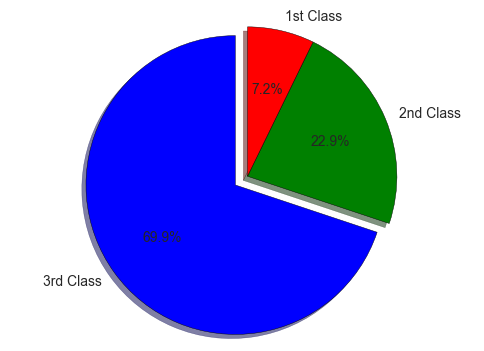

In [125]:
kids3 = titanic_df[(titanic_df.Age  <16 ) & (titanic_df.Pclass == 3)]
print("Kids in 3rd class=", len(kids3))

kids2 = titanic_df[(titanic_df.Age  <16 ) & (titanic_df.Pclass == 2)]
print("Kids in 2nd class=",len(kids2))

kids1 = titanic_df[(titanic_df.Age  <16 ) & (titanic_df.Pclass == 1)]
print("Kids in 1st class=",len(kids1))

labels = '3rd Class', '2nd Class', '1st Class'
sizes = [58, 19, 6]
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

Most people know the phrase, "Women and children first", when talking about the sinking of the titanic. Taking a quick look at the data on children (age less than 16), we can see that 59% of children survived. This is well over the overall average of 38%, and even more impressive because most of the children were in 3rd class. As you will see below, women in 3rd class had a 50% chance of surviving.

In [92]:
# How about older passengers -- how did they do?

old = titanic_df[(titanic_df.Age > 50)]
print("Older than 50 =", len(old))

s_old = titanic_df[(titanic_df.Age > 50) & (titanic_df.Survived == 1)] 
print ("Older than 50 and survived =", len(s_old))

c_old = titanic_df[(titanic_df.Age > 50) & (titanic_df.Pclass ==1)]
print ("Older than 50 and in 1st class =", len(c_old))
       
c_s_old = titanic_df[(titanic_df.Age > 50) & (titanic_df.Survived == 1) & (titanic_df.Pclass ==1)]
print ("Older than 50 and survived while in 1st class =" ,len(c_s_old))

old_f = titanic_df[(titanic_df.Age > 50) & (titanic_df.Sex == 'female')]
print ("Women older than 50 =", len(old_f))

f_s_old = titanic_df[(titanic_df.Age > 50) & (titanic_df.Survived == 1) & (titanic_df.Sex == 'female')]
print("Women older than 50 and survived =", len(f_s_old))

f_c_old = titanic_df[(titanic_df.Age > 50) & (titanic_df.Pclass == 1) & (titanic_df.Sex == 'female')]
print ("Women older than 50 and in 1st class =", len(f_c_old))
                  
f_c_s_old = titanic_df[(titanic_df.Age > 50) & (titanic_df.Survived == 1) & (titanic_df.Pclass ==1)
&(titanic_df.Sex == 'female')]
print("Women older than 50 and survived in 1st class =", len(f_c_s_old))


Older than 50 = 64
Older than 50 and survived = 22
Older than 50 and in 1st class = 39
Older than 50 and survived while in 1st class = 18
Women older than 50 = 17
Women older than 50 and survived = 16
Women older than 50 and in 1st class = 13
Women older than 50 and survived in 1st class = 13


We can see that only 34 percent of people over the age of 50 survived, but 82 percent of older people in first class survived. What we don't know is why the older people did poorly in the other classes. Were younger people of all sorts prioritized over older? Did older people have a harder time surviving the conditions or perhaps difficulty making it to the life boats? We know 1st class status helped the older people (especially the women -- all of the surviving older women were in 1st class). 1st class status didn't seem to help the men much -- only 5/26 survived. We can conclude that old women in 1st class did very well, while old men didn't (4/47 outside of 1st survived).

In [93]:
# Is there is a relationship between being a mother with a child and surviving? 

survived_females_wchild = titanic_df[(titanic_df.Sex == 'female') & (titanic_df.Survived == 1) 
                                     &(titanic_df.Age >18) & (titanic_df.Parch > 0)]
print ("Mothers with children that survived =", len(survived_females_wchild))

females_wchild = titanic_df[(titanic_df.Sex == 'female') & (titanic_df.Parch > 0)&(titanic_df.Age >18)]
print("Mothers with children =", len(females_wchild))

Mothers with children that survived = 48
Mothers with children = 64


Above, you can that 48/64 (75 percent) women with children survived.  This is right in line with the 74 percent survival rate for women, so we can dismiss this as an important combination. Next, I'm looking at the effect that class had on survival rate:

In [94]:
titanic_df.groupby(['Pclass']).size()

# Here, we are finding out how many passengers are in each class.
# 1st class has 216.
# 2nd class has 184.
# 3rd class has 491.

Pclass
1    216
2    184
3    491
dtype: int64

In [95]:
titanic_df.groupby(['Survived','Pclass']).size()

# Now we can find the percentage of people that survived from each class.
# 1st class:  80/216 died.  136/216 survived.  Survival rate = 63%
# 2nd class:  97/184 died.  87/184 survived.  Survival rate = 47%
# 3rd class:  372/491 died.  119/491 survived.  Survival rate = 24%

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [96]:
titanic_df.groupby([ 'Pclass', 'Sex']).size()

# Here, we can quickly see how many males and females were in each passenger class.

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

As expected, 1st class had the highest survival rate, at 63%. Then came 2nd class, at 47%. Last was 3rd class, at 24%. 3rd class made up a majority of passengers (491/891 = 55%), but it was also largely composed of men (347/491 = 71%).

Class was a very important factor determining survival. It doesn't seem that there were extraneous variables influencing this statistic. 1st class was, ineed, located in the center of the ship and slightly higher (on average) than the other classes, but we know that the ship took hours to sink and that plenty of women were able to make it from 3rd class to the lifeboats.  

By this point, we can be pretty sure that sex and class were the big factors determining one's likelihood of surviving the titanic disaster.

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
dtype: int64


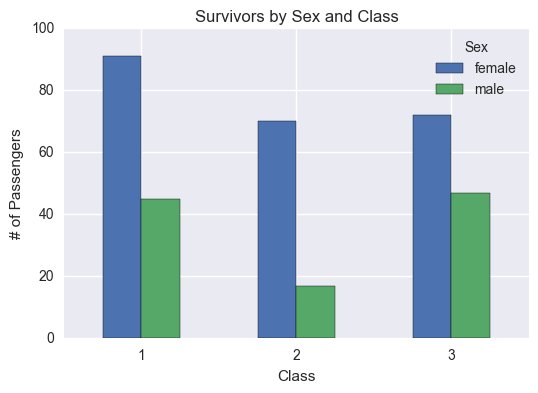

In [101]:
print (titanic_df.groupby(['Survived', 'Pclass', 'Sex']).size())


rspc = titanic_df.groupby(['Pclass', 'Sex'])['Survived'].sum().unstack()
chart = rspc.plot.bar()
chart.set(title = 'Survivors by Sex and Class', xlabel = 'Class', ylabel = '# of Passengers')
chart.set_xticklabels(range(1,4), rotation = 0)
chart
# Finally, we are looking at the number of survivors based on sex and passenger class. 
# Some interesting stats: 97% of female 1st classers survived!
#                         37% of male 1st classers survived.
#                         50% of female 3rd classers survived.
#                         14% of male 3rd classers survived.


Looking at the chart above, it is easy to see all classes of females did better than all classes of men, but the results are much more drastic when you account for the fact that there were so many more males aboard. 

The only way to get a true picture of what is going on is to evaluate the data based on sex and class. First I will calculate the expected number of survivors for each class using survivorship by sex and survivorship by class
     (Exp. by Sex),                  (Exp. by Class):
Male 1st -- .189 x 122 = 23,       Male 1st -- .63 x 122 = 76 --     Actual = 45;
Male 2nd -- .189 x 108 = 20.4,     Male 2nd -- .47 x 108 = 51 --    Actual = 17;
Male 3rd -- .189 x 347 = 65.6,     Male 3rd -- .24 x 347 = 83 --    Actual = 47;
Judging by these numbers, we can see that men did worse than expected in every category except for 1st class. Their 1st class ranking gave them a better chance of survival, but still not as good as the first class average.

Now the same analysis for women:
Female 1st -- .742 x 94 = 70       Female 1st -- .63 x 94 = 59 --    Actual = 91
Female 2nd -- .742 x 76 = 56       Female 2nd -- .47 x 76 = 36 --   Actual = 70
Female 3rd -- .742 x 144 = 107     Female 3rd -- .24 x 144 = 35 --   Actual = 72
The female data shows that women did better than expected in every category except 3rd class. 3rd class status dragged them down, but they still did better than the average in this category.



In this analysis, I was using sex as a starting point and looking to see if sex, when combined with class, was able to skew the outcome. Assuming class and sex had an equal weighting on the effect of survivorship, the actual outcome should have been in the middle of the expected values. The only cases where class overwhelmed sex were for men in 1st class and women in 3rd class. We can see that combinations of class and sex had synergistic effects in some cases, but judging by this data, the most important factor was being a woman, in terms of surviving.

---

Limitations:  Something to be aware of regarding this data set is that it is not complete. There were about 50% more people aboard the titanic, but this data seems to be a fairly representative sample. With this sample, we were able to make some broad conclusions, but these conclusions cannot be tested, as the titanic disaster was a one-off event. There was some data that was not used in this analysis -- namely, cabin number. We could have looked at the exact placement of cabin numbers and the layout of the ship, but most of the cabin numbers were missing and this would be very time consuming. Also, the narrower the focus, the more susceptible to extraneous variables that simply cannot be accounted for. We were able to get a very general idea of factors that likely affected survivorship.

I am concluding that sex and age were most important to survivorship. Although women overall had the best chance of surviving, most of the children were in 2nd and 3rd class and did better than women in these categories. Older people (most of which were men) had a very poor chance of surviving (9 percent if you exclude first class and women). The next factor of importance was class. Being in 1st class had a definite boost on survival rate, while being in 3rd hurt one's chances of survival.

So, if you had to pick, be a woman over the age of 50 in 1st class (100% survival rate!); then be a woman in first class; then be any woman or child. Don't be a man and especially don't be an old man! Better yet -- just don't be on the Titanic!